I know this stuff exists in a lot of the analyses I have done but I find it easier to just start fresh on this one page and have everything I need very concisely

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
#import sys
#sys.path.insert(1, '../../../string/analysis/scripts')
#from gate_functions import *

In [45]:
condition = 'BFRU'
skip25 = False
if skip25:
    skipframe = '.skip25.'
else:
    skipframe = '.'

starting_ps_name_dir = {'BFRU':['8500', '8500', '10780'], 
                       'apo':['11200', '11200', '10000']}
indir = f'../../state_by_state_running/targeted_MD/influx_{condition}_all_heavy'

bOutOcc_Occ = mda.Universe(f'{indir}/OutOcc-Occ/OutOpen-OutOcc.{starting_ps_name_dir[condition][0]}ps.gro', \
                          f'{indir}/OutOcc-Occ/OutOcc-Occ{skipframe}xtc')

bOutOcc_InOcc = mda.Universe(f'{indir}/OutOcc-InOcc/OutOpen-OutOcc.{starting_ps_name_dir[condition][1]}ps.gro', \
                          f'{indir}/OutOcc-InOcc/OutOcc-InOcc{skipframe}xtc')

bOcc_InOcc = mda.Universe(f'{indir}/Occ-InOcc/OutOcc-Occ.{starting_ps_name_dir[condition][2]}ps.gro', \
                          f'{indir}/Occ-InOcc/Occ-InOcc{skipframe}xtc')



condition = 'apo'
indir = f'../../state_by_state_running/targeted_MD/influx_{condition}_all_heavy'

aOutOcc_Occ = mda.Universe(f'{indir}/OutOcc-Occ/OutOpen-OutOcc.{starting_ps_name_dir[condition][0]}ps.gro', \
                          f'{indir}/OutOcc-Occ/OutOcc-Occ{skipframe}xtc')

aOutOcc_InOcc = mda.Universe(f'{indir}/OutOcc-InOcc/OutOpen-OutOcc.{starting_ps_name_dir[condition][1]}ps.gro', \
                          f'{indir}/OutOcc-InOcc/OutOcc-InOcc{skipframe}xtc')

aOcc_InOcc = mda.Universe(f'{indir}/Occ-InOcc/OutOcc-Occ.{starting_ps_name_dir[condition][2]}ps.gro', \
                          f'{indir}/Occ-InOcc/Occ-InOcc{skipframe}xtc')




bfru_sim_l = [bOutOcc_Occ, bOcc_InOcc, bOutOcc_InOcc]
apo_sim_l = [aOutOcc_Occ, aOcc_InOcc, aOutOcc_InOcc]

In [46]:
gate_EC = [(30,37), (289,295)]
gate_IC = [(136,145), (386,394)]


def make_gate_arr(md_uni, gate_EC, gate_IC):
    from MDAnalysis.analysis import distances
    import numpy as np

    gate_EC_dists = []
    gate_IC_dists = []

    for timestep in md_uni.trajectory:
        tm1 = md_uni.select_atoms('resid %i-%i' %(gate_EC[0][0], gate_EC[0][1])).center_of_mass()
        tm7 = md_uni.select_atoms('resid %i-%i' %(gate_EC[1][0], gate_EC[1][1])).center_of_mass()
        tm4 = md_uni.select_atoms('resid %i-%i' %(gate_IC[0][0], gate_IC[0][1])).center_of_mass()
        tm10 = md_uni.select_atoms('resid %i-%i' %(gate_IC[1][0], gate_IC[1][1])).center_of_mass()


        gate_EC_dists.append(float(distances.distance_array(tm1, tm7)))
        gate_IC_dists.append(float(distances.distance_array(tm4, tm10)))
    print("returning EC gate, IC gate dists")
    gate_EC_dists = np.array(gate_EC_dists) / 10
    gate_IC_dists = np.array(gate_IC_dists) / 10
    return gate_EC_dists, gate_IC_dists

In [47]:
occ = mda.Universe('../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOcc-Occ/OCC.start.gro')
out_occ = mda.Universe('../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOpen-OutOcc/OUT-OCC.start.gro')
in_occ = mda.Universe('../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOcc-InOcc/IN-OCC.start.gro')

model_EC = []
model_IC = []

model_l = [out_occ, occ, in_occ]
for u in model_l:
    EC, IC = make_gate_arr(u, gate_EC = gate_EC, gate_IC = gate_IC)
    model_EC.append(EC)
    model_IC.append(IC)
model_IC = np.array(model_IC)
model_EC = np.array(model_EC)

returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists


returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists


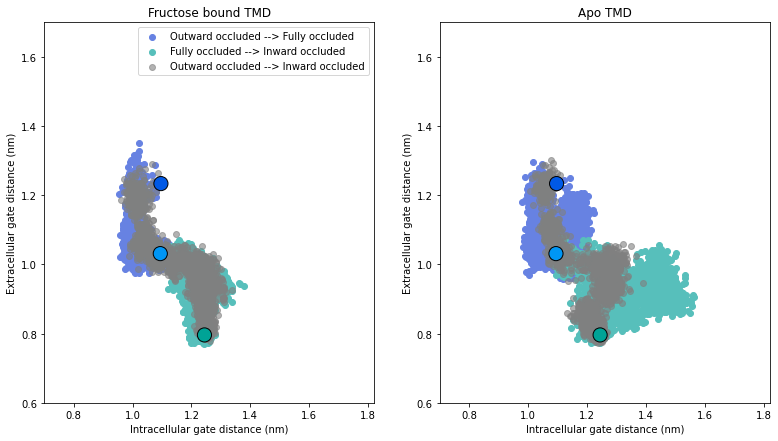

In [58]:
f, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (13,7))
color_l = ['#6782E2', '#57BFBB', 'grey']
label_l = ['Outward occluded --> Fully occluded', 'Fully occluded --> Inward occluded', 'Outward occluded --> Inward occluded']
a = [1,1,0.6]

for n,u in enumerate(bfru_sim_l):
    gate_EC_dists, gate_IC_dists = make_gate_arr(u, gate_EC, gate_IC)
    ax1.scatter(gate_IC_dists, gate_EC_dists, color = color_l[n], alpha = a[n], label = label_l[n])

for n,u in enumerate(apo_sim_l):
    gate_EC_dists, gate_IC_dists = make_gate_arr(u, gate_EC, gate_IC)
    ax2.scatter(gate_IC_dists, gate_EC_dists, color = color_l[n], alpha = a[n], label = label_l[n])    
    

ax1.scatter(model_IC, model_EC, color = ['#0059E6', '#0096F5', '#00A396'], s = 200, edgecolors='black')
ax2.scatter(model_IC, model_EC, color = ['#0059E6', '#0096F5', '#00A396'], s = 200, edgecolors='black')
 
    
xlim = (0.7, 1.82)
ylim = (0.6, 1.7)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_xlabel('Intracellular gate distance (nm)')
ax1.set_ylabel('Extracellular gate distance (nm)')
ax1.set_title('Fructose bound TMD')

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_xlabel('Intracellular gate distance (nm)')
ax2.set_ylabel('Extracellular gate distance (nm)')
ax2.set_title('Apo TMD')

ax1.legend()
plt.savefig('../images_figs/TMD_skipping_occluded.png', dpi = 1000)